In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets

from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions

Traitement des données 

In [46]:
df_diabetes = pd.read_csv("diabetes.csv")

df_diabetes
df=df_diabetes

In [48]:
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [49]:
print((df_diabetes[df_diabetes.columns] == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Pour Pregnancy les valeurs 0 representent No pegnancy. Pour les autres colonnes  il est impossible d'avoir des 0. 
Donc on doit remplacer les 0 par des NaN et puis on va utiliser la fonction ffill()  pour mettre des valeurs.

In [50]:
df_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.nan)


In [51]:
df_diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

On remplace les NaN values

In [52]:
df_diabetes = df_diabetes.fillna(method = 'ffill')
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [53]:
df_diabetes.nunique().sort_values()

Outcome                       2
Pregnancies                  17
BloodPressure                46
SkinThickness                50
Age                          52
Glucose                     135
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    517
dtype: int64

In [54]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,765.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.514323,72.308594,29.257812,157.332026,32.482031,0.471876,33.240885,0.348958
std,3.369578,30.531191,12.375474,10.544310,114.314401,6.908600,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,78.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.350000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,194.000000,36.725000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
df_diabetes.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

On passe à la recherche des Outliers en utilisant les boxplots 

c:\Users\ouabbao\AppData\Local\Programs\Python\Python310\Mydemovenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ouabbao\AppData\Local\Programs\Python\Python310\Mydemovenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ouabbao\AppData\Local\Programs\Python\Python310\Mydemovenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arg

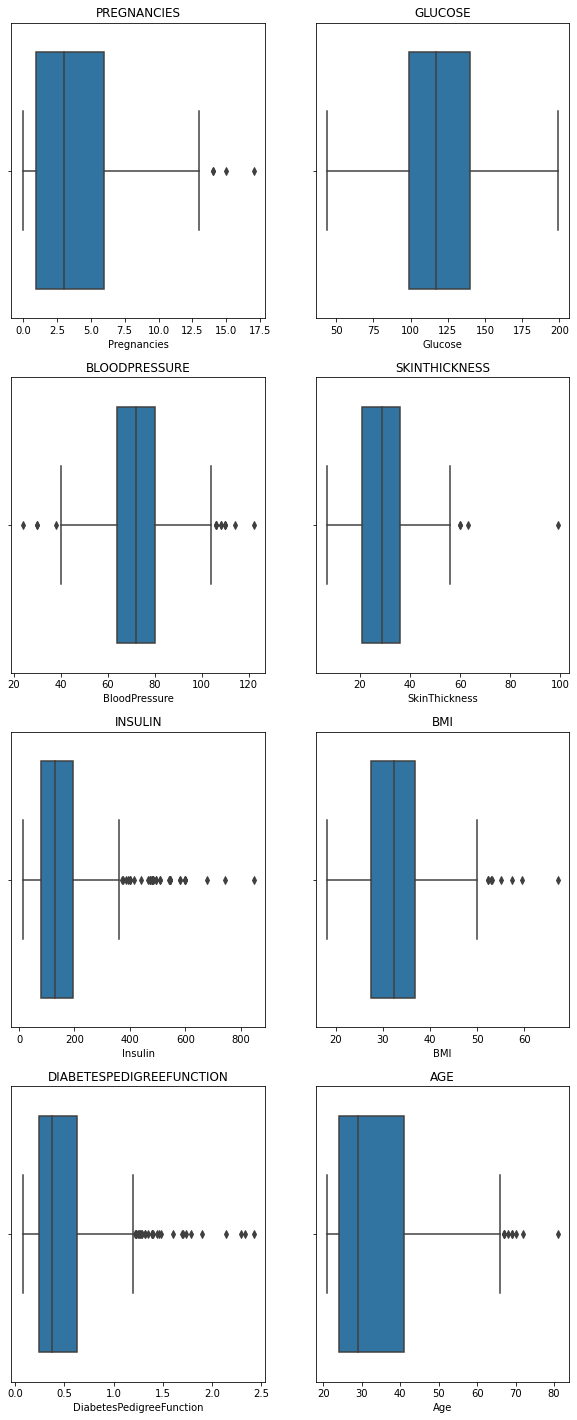

In [56]:
fig1,axes1 =plt.subplots(4,2,figsize=(10, 25))
list1_col= df_diabetes.columns
for i in range(len(list1_col)-1):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df_diabetes[list1_col[i]],ax=ax).set(title= list1_col[i].upper())

On remarque qu'on a pas des valeurs qui s'écartent de le médiane pour Glucose,Age et Bloodpressure, Tandis que pour Pregnancy,Insulin,SkinThickness,BMI,DiabetesPedigreeFunction on a des outliers, si on prend l'exemple de pregnancy on a des valeurs qui depassent 9 mois ce qui n'a pas de sens . 

On va essayer d'enlever les Outliers en utilisant la technique IQR 

In [62]:

Q1 = df_diabetes.quantile(0.25)
Q3 = df_diabetes.quantile(0.75)
IQR = Q3 - Q1


df_diabetes = df_diabetes[~((df_diabetes.iloc[:,0:1] < (Q1 - 1.5 * IQR)) |(df_diabetes.iloc[:,0:1] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_diabetes = df_diabetes[~((df_diabetes.iloc[:,3:4] < (Q1 - 1.5 * IQR)) |(df_diabetes.iloc[:,3:4] > (Q3 + 1.5 * IQR))).any(axis=1)] 
df_diabetes = df_diabetes[~((df_diabetes.iloc[:,4:5] < (Q1 - 1.5 * IQR)) |(df_diabetes.iloc[:,4:5] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_diabetes = df_diabetes[~((df_diabetes.iloc[:,5:6] < (Q1 - 1.5 * IQR)) |(df_diabetes.iloc[:,5:6] > (Q3 + 1.5 * IQR))).any(axis=1)] 
df_diabetes = df_diabetes[~((df_diabetes.iloc[:,6:7] < (Q1 - 1.5 * IQR)) |(df_diabetes.iloc[:,6:7] > (Q3 + 1.5 * IQR))).any(axis=1)]  


C:\Users\ouabbao\AppData\Local\Temp\ipykernel_8112\1492339136.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_diabetes = df_diabetes[~((df_diabetes.iloc[:,0:1] < (Q1 - 1.5 * IQR)) |(df_diabetes.iloc[:,0:1] > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\ouabbao\AppData\Local\Temp\ipykernel_8112\1492339136.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_diabetes = df_diabetes[~((df_diabetes.iloc[:,3:4] < (Q1 - 1.5 * IQR)) |(df_diabetes.iloc[:,3:4] > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\ouabbao\AppData\Local\Temp\ipykernel_8112\1492339136.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and wil

In [67]:
#Avant d'enlever les Outliers
print(df.Pregnancies.shape)
print(df.Insulin.shape)
print(df.SkinThickness.shape)
print(df.BMI.shape)
print(df.DiabetesPedigreeFunction.shape)

(768,)
(768,)
(768,)
(768,)
(768,)


In [65]:
#Après enlever les Outliers
print(df_diabetes.Pregnancies.shape)
print(df_diabetes.Insulin.shape)
print(df_diabetes.SkinThickness.shape)
print(df_diabetes.BMI.shape)
print(df_diabetes.DiabetesPedigreeFunction.shape)

(669,)
(669,)
(669,)
(669,)
(669,)


On affiche les mêmes boxplots pour s'assurer que les Outliers ont été supprimés 

c:\Users\ouabbao\AppData\Local\Programs\Python\Python310\Mydemovenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ouabbao\AppData\Local\Programs\Python\Python310\Mydemovenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ouabbao\AppData\Local\Programs\Python\Python310\Mydemovenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arg

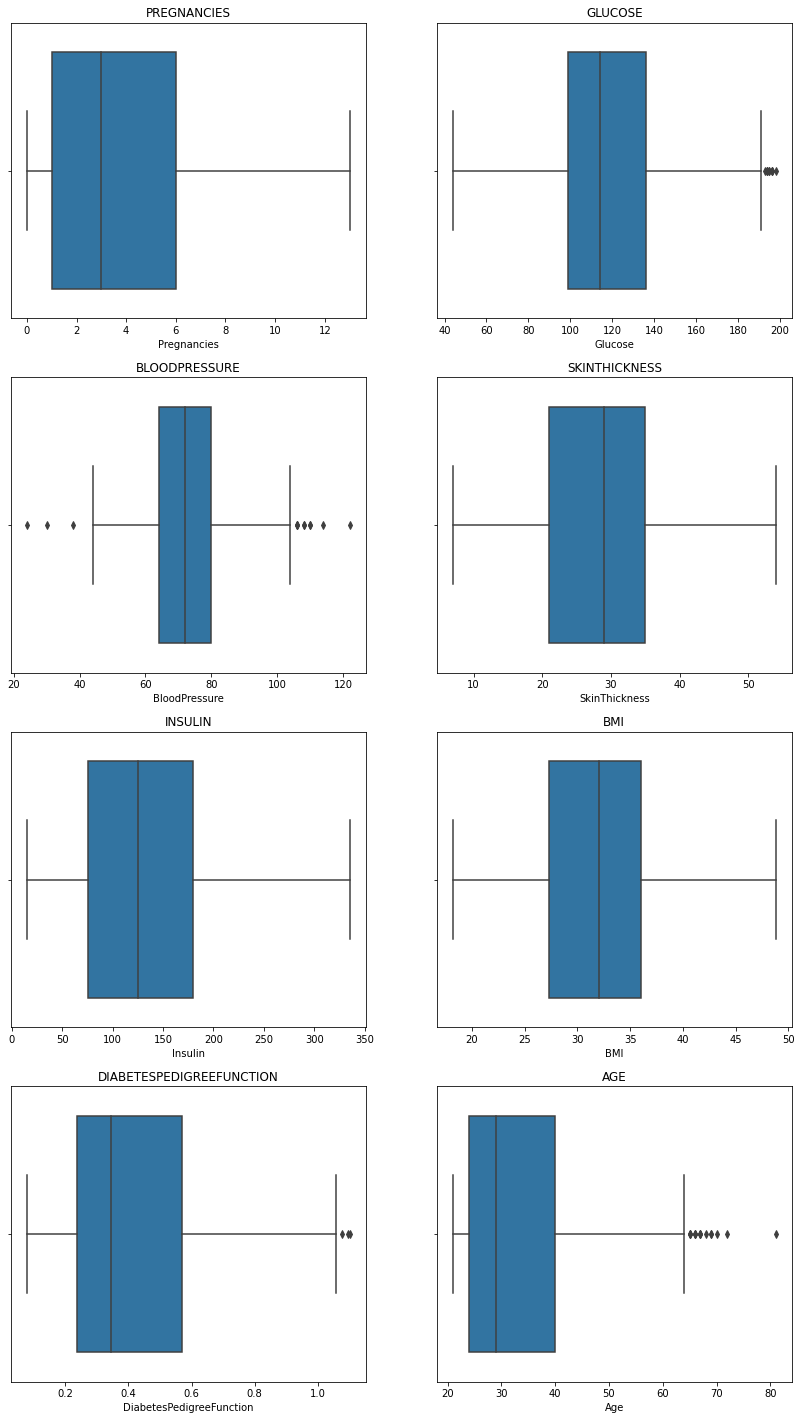

In [68]:
fig1, axes1 =plt.subplots(4,2,figsize=(14, 25))
list1_col= df_diabetes.columns
for i in range(len(list1_col)-1):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df_diabetes[list1_col[i]],ax=ax).set(title=list1_col[i].upper())

Data Visualization

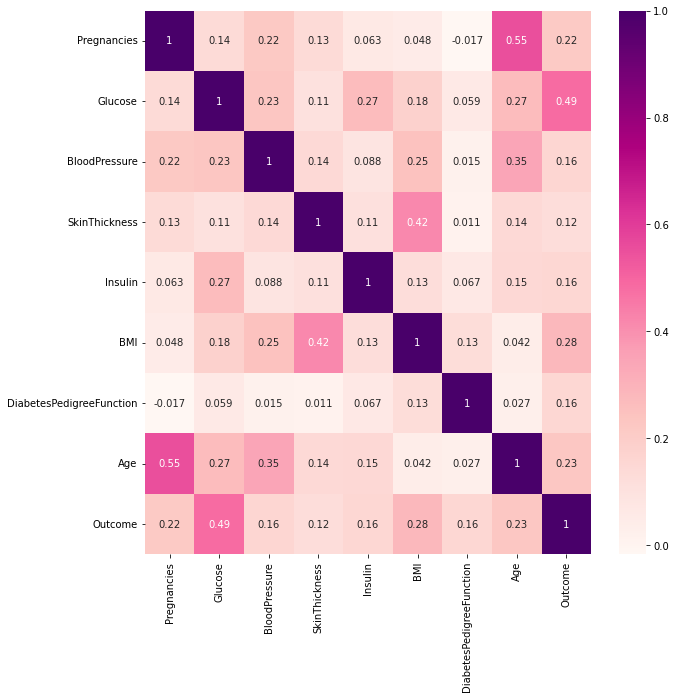

In [71]:
#Heatmap
corrmat = df_diabetes.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_diabetes[top_corr_features].corr(),annot=True,cmap="RdPu")

Outcome est  corrélé à 48 % avec le glucose, ce qui est évident car le diabète dépend fortement du taux de glucose dans notre sang.
L'âge et les grossesses sont également corrélés de 55%. En dessous de 18 ans, personne ne peut tomber enceinte ni après 50 ans.

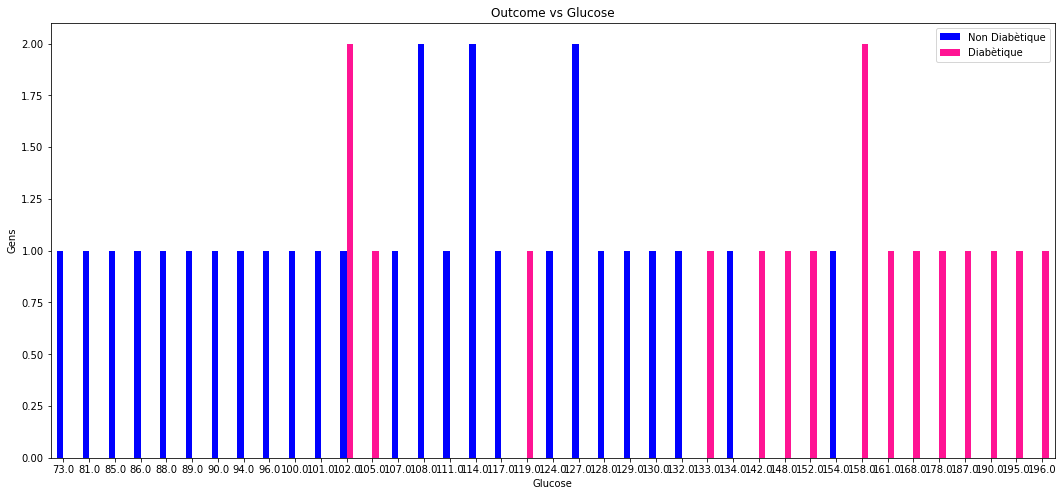

In [78]:
# On compare le Outcome au Glucose
pd.crosstab(df_diabetes.Glucose[::15],df_diabetes.Outcome).plot(kind="bar",figsize=(18,8),color=["blue","deeppink"])
plt.ylabel("Personnes");
plt.xticks(rotation=0);
plt.legend(['Non Diabètique', 'Diabètique'])
plt.title('Outcome vs Glucose')
plt.show()

c:\Users\ouabbao\AppData\Local\Programs\Python\Python310\Mydemovenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

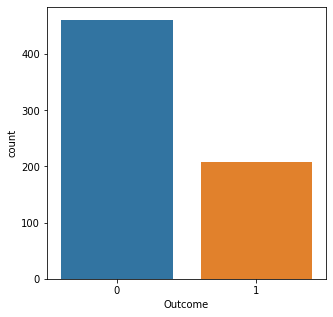

In [72]:
plt.figure(figsize=(5,5))
sns.countplot(df_diabetes["Outcome"])

Scaling les données 

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_diabetes[df_diabetes.columns] = scaler.fit_transform(df_diabetes[df_diabetes.columns])
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.675325,0.489796,0.595745,NaN,0.503268,0.536657,0.483333,1.0
1,0.076923,0.266234,0.428571,0.468085,NaN,0.274510,0.266862,0.166667,0.0
2,0.615385,0.902597,0.408163,0.468085,NaN,0.166667,0.580645,0.183333,1.0
3,0.076923,0.292208,0.428571,0.340426,0.246875,0.323529,0.086999,0.000000,0.0
5,0.384615,0.467532,0.510204,0.595745,0.478125,0.241830,0.120235,0.150000,0.0


Modeling

In [106]:
from sklearn.model_selection import train_test_split, cross_val_score
df_diabetes.sample(frac=1)

#Spliting the data
X = df_diabetes.drop("Outcome",axis=1)
y = df_diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
y_train.head()

30     0.0
299    0.0
423    0.0
256    0.0
312    1.0
Name: Outcome, dtype: float64

In [85]:
X_test.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
264,0.307692,0.512987,0.387755,0.170213,0.359375,0.450980,0.144673,0.233333
755,0.076923,0.545455,0.653061,0.680851,0.296875,0.598039,0.956989,0.266667
224,0.076923,0.363636,0.428571,0.170213,0.128125,0.176471,0.574780,0.083333
615,0.230769,0.402597,0.489796,0.404255,0.403125,0.248366,0.126100,0.100000
533,0.461538,0.305195,0.428571,0.957447,0.156250,0.379085,0.413490,0.166667


In [98]:
y_test.head()

427    1.0
185    1.0
551    0.0
614    1.0
328    1.0
Name: Outcome, dtype: float64

In [100]:
df_diabetes = df_diabetes.fillna(method = 'ffill')
df_diabetes = df_diabetes.fillna(method = 'bfill')
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [126]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
# Evaluer le Modèle
log_reg = model.score(X_test,y_test)

In [138]:

# KNN
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train);
# Evaluer le Modèle
knn = knn1.score(X_test,y_test)

In [139]:
# Support Vector Machine
svm1 = SVC()
svm1.fit(X_train,y_train)
# Evaluer le Modèle
svm = svm1.score(X_test,y_test)

In [140]:
# Random forest classifier
clf1= RandomForestClassifier()
clf1.fit(X_train,y_train);
# Evaluer le Modèle
clf = clf1.score(X_test,y_test)


In [150]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                             "Support Vector Machine":svm,
                            "Random Forest Classifier":clf,
                          
                            },index=["accuracy"])
model_compare

,Logistic Regression,KNN,Support Vector Machine,Random Forest Classifier
accuracy,0.776119,0.723881,0.776119,0.746269


La précision des 4 modèles depassent 70% 
Pour décider quel modèle convient le mieux à notre Dataset, nous vérifions l'AUC de tous les modèles. Le modèle avec un bon score AUC est le meilleur modèle pour notre dataset.

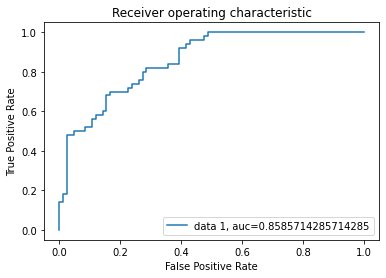

In [142]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

 AUC de la régression logistique est de 85% ce qui est assez bon.

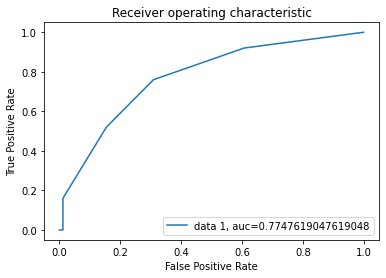

In [145]:
y_pred_proba = knn1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

 AUC u KNN est de 77% ce qui est moins  bon que le premier.

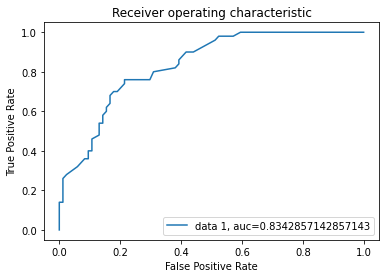

In [148]:
y_pred_proba = clf1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

 AUC du Random forst classifier est de 83% ce qui est meilleur que KNN mais il reste moins bon que la regression logistique.

La régression logistique a le score AUC le plus élevé, donc le modèle de régression logistique est le modèle parfait pour notre dataset
Le modèle SVM est également un bon modèle pour notre dataset car il offre une  précision égale à celle de la régression logistique.